# Telco Churn Analysis

## Imports

In [1]:
import acquire as a
import prepare as p
import explore as e
import model as m

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Acquire
* Data acquired from the Codeup MySQL database `telco_churn`
* It contained 7043 rows and 22 columns before cleaning
* Each row represents an individual customer at Telco
* Each column represents a feature of the customers

In [2]:
# running the acquire_data() function from my acquire.py file 
# saving this dataframe as the variable 'df'

df = a.acquire_data()

## Prepare
* Drop duplicate columns
    * `payment_type_id` *- data exists in the `payment_type` column*
    * `internet_service_type_id` *- data exists in the `internet_service_type` column*
    * `contract_type_id` *- data exists in the `contract_type` column*
* Create `internet_service` column to indicate whether a customer subscribes to internet service & move after `multiple_lines` column
* Correct values & datatypes
    * changed values in the `senior_citizen` column from '1 or 0' to 'Yes or No'
    * filled null values in the `internet_service_type` with 'No internet service' based off of comparison to the `online_security` column
    * changed values in the `total_charges` from an object to a float
* Split data into 3 new dataframes, stratifying on `churn`:
    * Train - 60% of the original dataframe
    * Validate - 20% of the original dataframe
    * Test - 20% of the original dataframe
* No outliers have been removed

In [3]:
# running the prepare_data() function from my prepare.py file 
# saving dataframe as the variable 'df'

df = p.prepare_data(df)

In [4]:
# running the split_data() function from my prepare.py file
# saving the split dataframes in the following variables: train, validate, test

train, validate, test = p.split_data(df,'churn')

### Overview:

In [5]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
5103,7169-YWAMK,Male,No,Yes,Yes,72,Yes,No,Yes,Yes,...,Yes,Yes,No,No,68.4,4855.35,0,Two year,DSL,Bank transfer (automatic)
4461,6288-LBEAR,Female,No,No,No,23,Yes,No,Yes,No,...,Yes,No,No,Yes,79.1,1783.75,0,Month-to-month,Fiber optic,Mailed check
1932,2808-CHTDM,Female,No,Yes,Yes,23,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No,25.1,611.45,0,Two year,No internet service,Mailed check
3187,4567-AKPIA,Female,No,Yes,Yes,41,Yes,Yes,Yes,No,...,Yes,Yes,Yes,Yes,109.1,4454.25,0,One year,Fiber optic,Bank transfer (automatic)
1999,2885-HIJDH,Male,No,Yes,Yes,69,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,No,86.9,6194.10,0,Two year,DSL,Bank transfer (automatic)


### Summary:

In [6]:
train.describe()

,tenure,monthly_charges,total_charges,churn
count,4225.000000,4225.000000,4225.000000,4225.000000
mean,32.195266,64.537136,2266.771929,0.265325
std,24.632613,30.274294,2277.238910,0.441559
min,0.000000,18.250000,0.000000,0.000000
25%,8.000000,35.000000,374.800000,0.000000
50%,29.000000,70.250000,1379.800000,0.000000
75%,55.000000,89.800000,3767.400000,1.000000
max,72.000000,118.750000,8672.450000,1.000000


## Data Dictionary
| Feature | Definition |
|:--------|:-----------|
|customer_id|Unique identifier for each customer|
|gender|The gender of the customer (male,female)|
|senior_citizen|Indicates whether the customer is a senior citizen|
|partner|Indicates whether the customer has a partner|
|dependents|Indicates whether the customer has dependents|
|tenure|The duration in months that a customer has been with the service provider|
|phone_service|Indicates whether the customer subscribes to phone service|
|multiple_lines|Indicates whether the customer has multiple phone lines|
|internet_service|Indicates whether the customer subscribes to internet service|
|online_security|Indicates whether the customer has online security features|
|online_backup|Indicates whether the customer has online backup features|
|device_protection|Indicates whether the customer has device protection features|
|tech_support|Indicates whether the customer has technical support services|
|streaming_tv|Indicates whether the customer subscribes to streaming TV services|
|streaming_movies|Indicates whether the customer subscribes to streaming movie services|
|paperless_billing|Indicates whether the customer has opted for paperless billing|
|monthly_charges|The amount charged to the customer on a monthly basis|
|total_charges|The total charges incurred by the customer|
|churn|Indicates whether the customer has churned|
|contract_type|Type of contract subscribed by the customer (month-to-month, one-year, two-year)|
|internet_service_type|Type of internet service subscribed by the customer (DSL, fiber optic)|
|payment_type|The method of payment chosen by the customer (bank transfer, credit card, electronic check, mailed check)|

## Explore

### How often are customers churning?

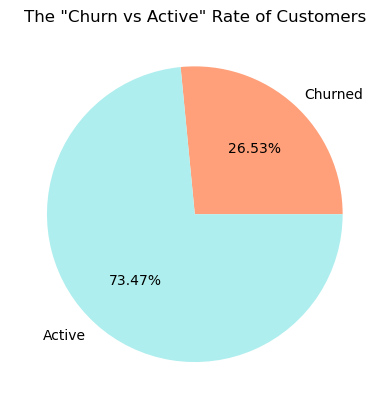

In [7]:
e.pie_churn(train,'churn')

### Does `tenure` affect the churn rate? 

> $H_0$: Tenure has NO effect on the churn rate

> $H_a$: Tenure HAS an effect on the churn rate

In [32]:
def bar_tenure(train):
    values = [train.tenure[(train.churn == True)].mean(),train.tenure[(train.churn == False)].mean()]
    labels = ['Churn','Active']
    plt.figure(figsize=(4, 4))
    plt.bar(height=values, x=labels, color=['lightsalmon','paleturquoise'])
    plt.title('Comparing Avg Tenure of Churn vs Active')
    plt.show()

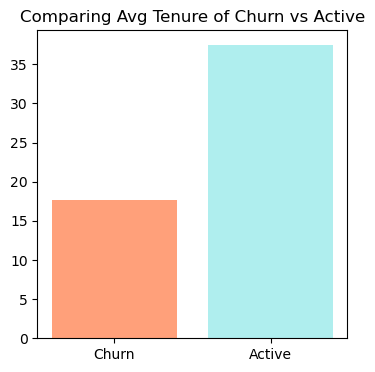

In [33]:
bar_tenure(train)

### Does `monthly_charges` affect the churn rate?

### Does `contract type` affect the churn rate?

In [ ]:
stats_top_three = e.top_three_rel_columns(train, 'churn')
stats_top_three

In [ ]:
train.churn = np.where(train['churn'] == 'Yes',1,0)

In [ ]:
for col in top_three:
    sns.barplot(x=(col),y='churn',data=train.sort_values(col))
    plt.axhline(train.churn.mean())
    plt.show()

In [ ]:
sns.histplot(data=train,x='tenure',hue='churn',)

In [ ]:
sns.scatterplot(data=train,x='tenure',y='monthly_charges',hue='churn')

In [ ]:
train

In [ ]:
train.payment_type.value_counts()